# Import Libraries

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"b131832","key":"f7a73782c14a6f3911babcd1fb784715"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 99% 229M/230M [00:11<00:00, 17.7MB/s]
100% 230M/230M [00:12<00:00, 20.0MB/s]


In [ ]:
!unzip sarscov2-ctscan-dataset.zip
!mkdir dataset/

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [ ]:
!mv COVID/ dataset/
!mv non-COVID/ dataset/

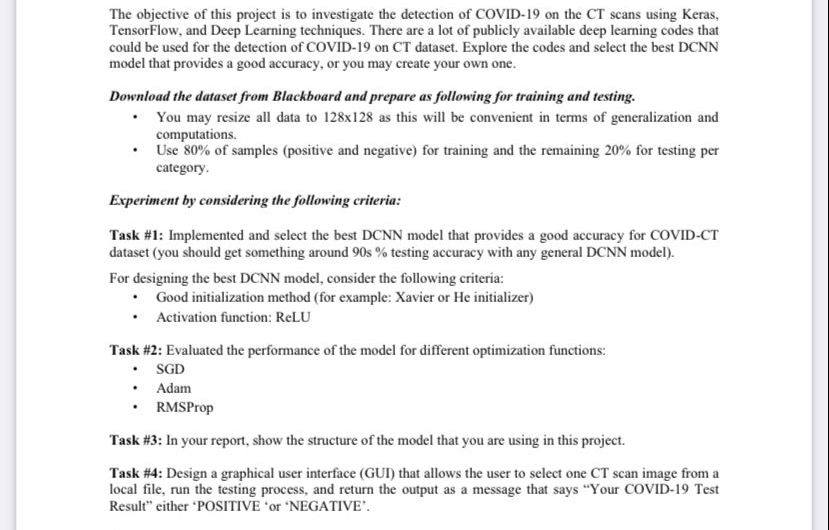

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [ ]:
img_path = 'dataset/'

img_size =224

# Prepare Training Data

In [ ]:
os.listdir(img_path)

['COVID', 'non-COVID']

In [ ]:
class_names=os.listdir(img_path)
def get_data(data_dir):
    img_data = []
    labels=[]
    for label in class_names:
        path = os.path.join(data_dir, label)
        class_num = class_names.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                img_data.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(e)
    return np.array(img_data),np.array(labels)

In [ ]:
img_data,labels = get_data(img_path)
print(f'the shape of input image data is {img_data.shape}, labels shape is {labels.shape}')

the shape of input image data is (2481, 224, 224, 3), labels shape is (2481,)


[Text(0, 0, 'COVID'), Text(0, 0, 'non-COVID')]

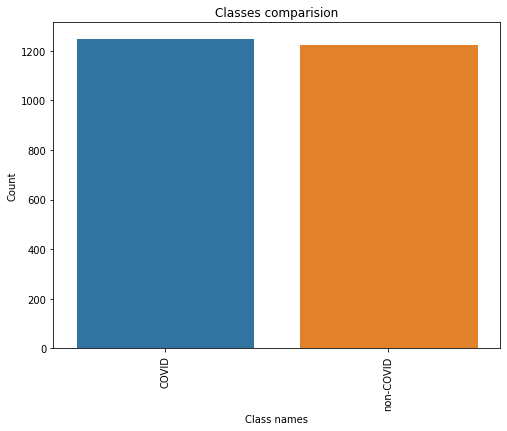

In [ ]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
sns.set_style('dark')
sns.countplot(y=labels)
plt.title('Classes comparision')
plt.xlabel('Class names')
plt.ylabel('Count')
ax.set_xticklabels(class_names,rotation=90)

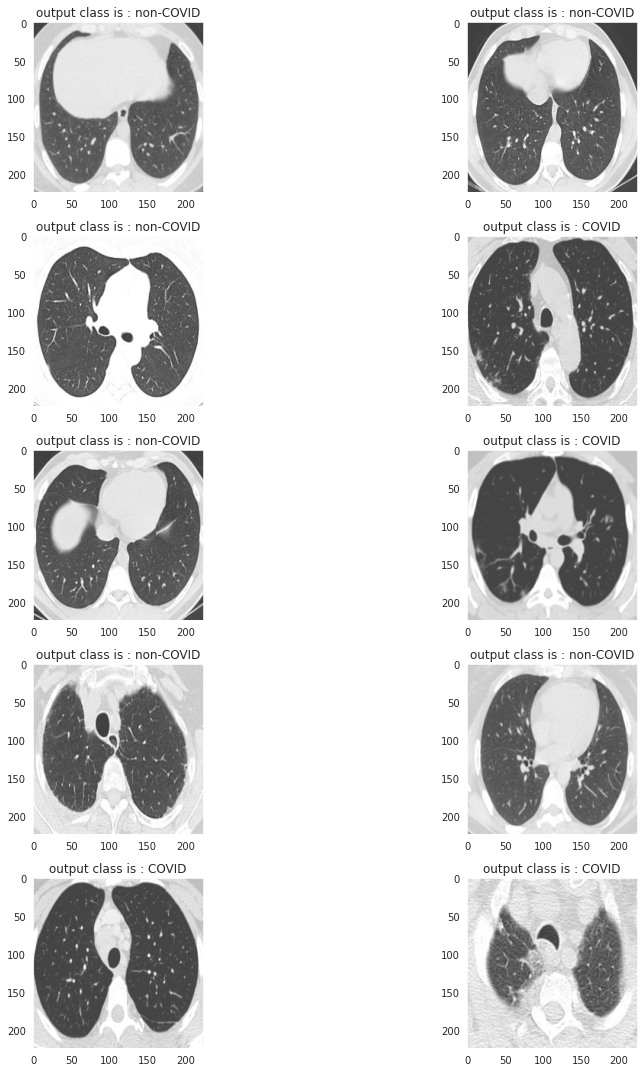

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(img_data))
        ax[i,j].imshow(img_data[l])
        ax[i,j].set_title('output class is : '+str(class_names[labels[l]]))

plt.tight_layout()

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
img_data=preprocess_input(img_data)
img_data[0]

array([[[0.6313726 , 0.6313726 , 0.6313726 ],
        [0.6       , 0.6       , 0.6       ],
        [0.6313726 , 0.6313726 , 0.6313726 ],
        ...,
        [0.62352943, 0.62352943, 0.62352943],
        [0.58431375, 0.58431375, 0.58431375],
        [0.67058825, 0.67058825, 0.67058825]],

       [[0.67058825, 0.67058825, 0.67058825],
        [0.6392157 , 0.6392157 , 0.6392157 ],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        ...,
        [0.60784316, 0.60784316, 0.60784316],
        [0.60784316, 0.60784316, 0.60784316],
        [0.58431375, 0.58431375, 0.58431375]],

       [[0.6784314 , 0.6784314 , 0.6784314 ],
        [0.6627451 , 0.6627451 , 0.6627451 ],
        [0.7019608 , 0.7019608 , 0.7019608 ],
        ...,
        [0.6156863 , 0.6156863 , 0.6156863 ],
        [0.6784314 , 0.6784314 , 0.6784314 ],
        [0.5921569 , 0.5921569 , 0.5921569 ]],

       ...,

       [[0.6784314 , 0.6784314 , 0.6784314 ],
        [0.6       , 0.6       , 0.6       ],
        [0.56078434, 0

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels)
labels[0]

array([1., 0.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(img_data,labels,test_size=0.2,random_state=0,stratify=labels)
print(f'X_train size is {X_train.shape}, X_test shape is {X_test.shape}')

X_train size is (1984, 224, 224, 3), X_test shape is (497, 224, 224, 3)


In [ ]:
# del img_data,labels

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# x_train=preprocess_input(x_train)
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model=Sequential()
model.add(inception)
model.add(Flatten())
model.add(Dense(len(class_names),activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

87924736/87910968 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
learning_rate=ReduceLROnPlateau(monitor='val_accuracy',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.0001)
cb_early_stop=EarlyStopping(monitor = 'val_loss', patience = 2)
callbacks_list=[learning_rate,cb_early_stop]

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size=64,callbacks=[callbacks_list])

Epoch 1/7
31/31 [==============================] - 24s 260ms/step - loss: 3.4551 - accuracy: 0.6517 - val_loss: 0.8609 - val_accuracy: 0.8048 - lr: 0.0010
Epoch 2/7
31/31 [==============================] - 5s 163ms/step - loss: 0.3681 - accuracy: 0.8936 - val_loss: 0.4882 - val_accuracy: 0.8612 - lr: 0.0010
Epoch 3/7
31/31 [==============================] - 5s 162ms/step - loss: 0.1567 - accuracy: 0.9441 - val_loss: 0.3381 - val_accuracy: 0.8994 - lr: 0.0010
Epoch 4/7
31/31 [==============================] - 5s 163ms/step - loss: 0.1095 - accuracy: 0.9556 - val_loss: 0.3320 - val_accuracy: 0.9014 - lr: 0.0010
Epoch 5/7
31/31 [==============================] - 5s 167ms/step - loss: 0.0308 - accuracy: 0.9924 - val_loss: 0.3614 - val_accuracy: 0.8813 - lr: 0.0010
Epoch 6/7
31/31 [==============================] - 5s 172ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.3009 - val_accuracy: 0.8913 - lr: 0.0010
Epoch 7/7
31/31 [==============================] - 5s 164ms/step - loss: 0.

Text(0.5, 1.0, 'val accuracy')

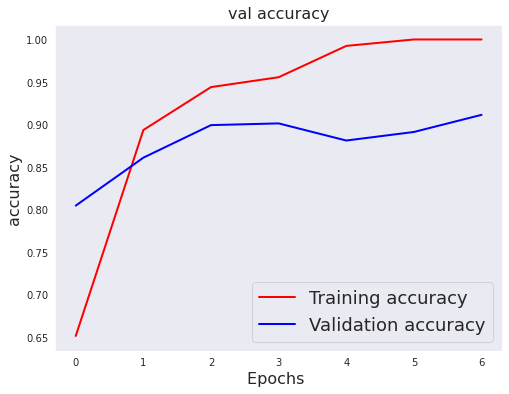

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=2.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

In [ ]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_test_labels=np.argmax(y_test,axis=1)

Accuracy : 91.14688128772636


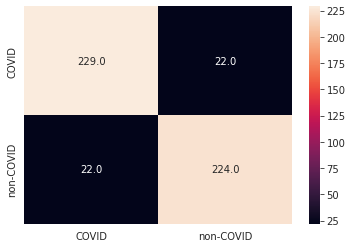

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
# print(confusion_matrix(y_test_labels,y_pred_classes))
sns.heatmap(confusion_matrix(y_test_labels,y_pred_classes),yticklabels=class_names,xticklabels=class_names,annot=True,fmt='.1f') # calculating the confusion matrix
accuracy=accuracy_score(y_test_labels,y_pred_classes)*100 # calculating the accuracy
print(f'Accuracy : {accuracy}')

**Using SGD as a optimizer**

In [ ]:
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model2=Sequential()
model2.add(inception)
model2.add(Flatten())
model2.add(Dense(len(class_names),activation='softmax'))

model2.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history2=model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size=64,callbacks=[callbacks_list])

Epoch 1/7
31/31 [==============================] - 10s 212ms/step - loss: 26.7636 - accuracy: 0.5938 - val_loss: 42.7299 - val_accuracy: 0.5211 - lr: 0.0100
Epoch 2/7
31/31 [==============================] - 5s 165ms/step - loss: 15.9716 - accuracy: 0.7001 - val_loss: 6.9537 - val_accuracy: 0.7686 - lr: 0.0100
Epoch 3/7
31/31 [==============================] - 5s 165ms/step - loss: 15.5634 - accuracy: 0.6885 - val_loss: 32.0908 - val_accuracy: 0.5231 - lr: 0.0100
Epoch 4/7
31/31 [==============================] - 5s 165ms/step - loss: 7.3549 - accuracy: 0.7858 - val_loss: 24.5424 - val_accuracy: 0.5392 - lr: 0.0100


In [ ]:
sgd_acc=model2.evaluate(X_test,y_test)[1]
sgd_acc

16/16 [==============================] - 1s 72ms/step - loss: 24.5427 - accuracy: 0.5392


0.5392354130744934

Text(0.5, 1.0, 'val accuracy')

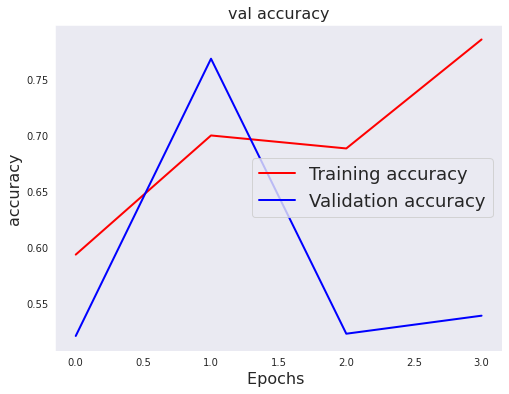

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=2.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

**Using RMSprop as a optimizer**

In [ ]:
inception=InceptionV3(weights='imagenet',include_top=False,input_shape=(img_size,img_size,3))
for layer in inception.layers[:-1]:
  layer.trainable=False

model3=Sequential()
model3.add(inception)
model3.add(Flatten())
model3.add(Dense(len(class_names),activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
history3=model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=7,batch_size=64,callbacks=[callbacks_list])

Epoch 1/7
31/31 [==============================] - 11s 214ms/step - loss: 9.8476 - accuracy: 0.6205 - val_loss: 3.8942 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 2/7
31/31 [==============================] - 5s 170ms/step - loss: 5.0633 - accuracy: 0.6946 - val_loss: 2.6645 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 3/7
31/31 [==============================] - 5s 176ms/step - loss: 3.9311 - accuracy: 0.7626 - val_loss: 4.4334 - val_accuracy: 0.7123 - lr: 0.0010
Epoch 4/7
31/31 [==============================] - 5s 168ms/step - loss: 3.5465 - accuracy: 0.7591 - val_loss: 6.3780 - val_accuracy: 0.6157 - lr: 0.0010


In [ ]:
rms_acc=model3.evaluate(X_test,y_test)[1]
rms_acc

16/16 [==============================] - 1s 73ms/step - loss: 6.3780 - accuracy: 0.6157


0.6156941652297974

Text(0.5, 1.0, 'val accuracy')

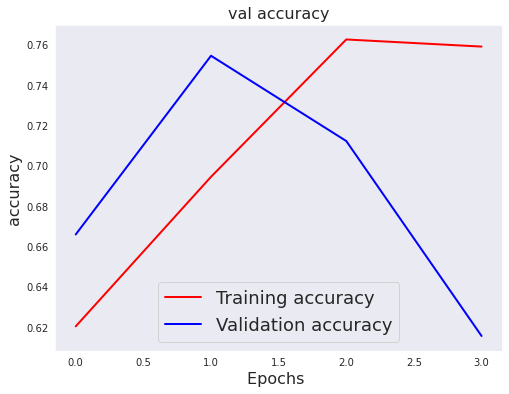

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=2.0)
plt.plot(history3.history['val_accuracy'],'b',linewidth=2.0)
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('val accuracy',fontsize=16)

Text(0, 0.5, 'accuracy')

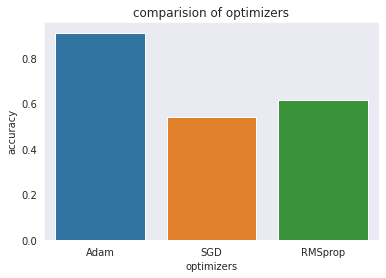

In [ ]:
results=pd.DataFrame(data=[[(accuracy/100),sgd_acc,rms_acc]],columns=['Adam','SGD','RMSprop'])
# results.head()
sns.barplot(data=results)
plt.title('comparision of optimizers')
plt.xlabel('optimizers')
plt.ylabel('accuracy')

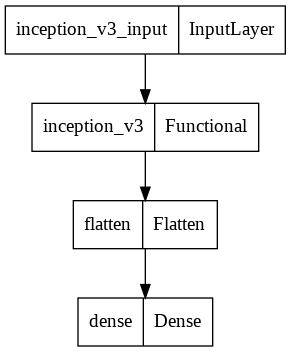

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

**testing with the images**

In [ ]:
from google.colab import files
files.upload()

Saving Covid (1).png to Covid (1).png


{'Covid (1).png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xca\x08\x02\x00\x00\x00\xc5\x14\tW\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xfc\xa1IDATx^\xbc\xdd\x87\xb7\x9f\xd5u\xee\xfb\xfd\xc7\x18\x03N/N\xcfM\xef\xcd7\x8e\x9d\xd8\xb8Q$\xba\x10Mt!\x81\x0cHHB]\x02\x81\x04\xdaj\xa8"\x84\x1a\xa6\x98b\x8cIl\xa7\xe7\xc6Inz1\x96\x04\x12\x08\x84\xc0p?\xbf\xdfw\xf3^]\xe7\xe4\x8c\x9cq\xc6\xb8k\x0c\xbf^\xefZs\xcd5\xe73\x9f9\xd7z\xb7\xb6\xc4\xc4SO=\xf5\xa5/}\xe9\xa5\x97^\xfa\xf2\x97\xbf\xfc\xfc\xf3\xcf?\xfb\xec\xb3\xcf=\xf7\x9c\xa7\xf6\xe2\x8b/\x9a2\xfe\xc5/~\xd1\xd43\xcf<\xf3\xf4\xd3O\x9b}\xe2\x89\'L\x11\xf0\xfa\xc2\x0b/\x18!F\x8f\x11bT\x19\xff\xcaW\xbe\xe2\xe9\xf5\x0b_\xf8\x02\x81\'\x9f|\xd2\xeb\x1f\xfe\xe1\x1f&9h\xb3\x84\x06#\x9a\xa9\xc6\rz\xda\xd4B\xb3\x0c\xf0J {\xfe\xf4O\xff\xf4\x8f\xfe\xe8\x8f\xe8\xf7\xfc\xbf\xc7\xed\x1f\xfe\xe1\x1f\xfe\xe9\x9f\xfe\xe9

(1, 224, 224, 3)

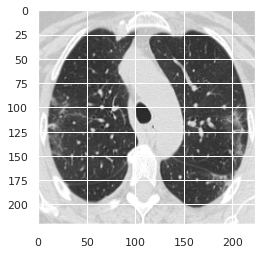

In [ ]:
image_name='Covid (1).png'   # enter image name to test

x1=[]
img_1 = cv2.imread(image_name, cv2.IMREAD_COLOR)
resized_arr_1 = cv2.resize(img_1, (img_size, img_size)) # Reshaping images to preferred size
plt.imshow(resized_arr_1)
x1.append([resized_arr_1])
x1=np.array(x1)
x1 = preprocess_input(x1)
x1 = x1.reshape(-1, img_size, img_size, 3)
x1.shape

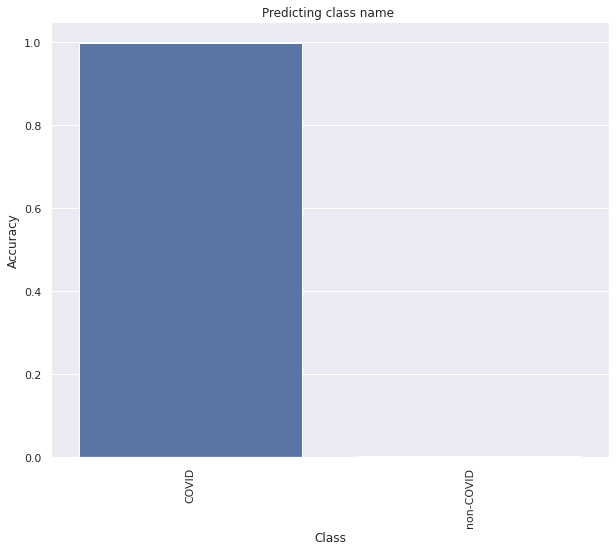

In [ ]:
pred=model.predict(x1) # for predicting class
labels_pred=np.argmax(pred,axis=1)
labels=class_names[labels_pred[0]]
pred_results=pd.DataFrame(data=pred,columns=class_names)
fig=plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
ax=sns.barplot(data=pred_results)
ax.set_xticklabels(class_names,rotation=90)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Predicting class name ')
plt.show()